In [10]:
from scipy.stats import skewnorm, lognorm
import tools
import pickle
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
import math

In [3]:
all_df = pickle.load(open('../pickles/NP_df.p','rb'))

all_statistics = tools.get_statistics(all_df)

flat = np.concatenate(all_df['norm']).ravel()

flat = flat[~np.isnan(flat)]

x = np.arange(-5,5,0.1)    

In [4]:
bw = 0.1

bin_edges = np.arange(-2.5,3,bw)

bin_centres = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2

p, bins = np.histogram(flat,
                    bins=bin_edges,
                    density=True,
                   )

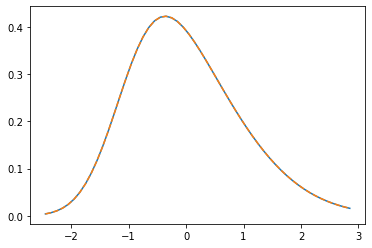

In [5]:

a, loc, scale = all_statistics['a'],all_statistics['loc'],all_statistics['scale']

sn = skewnorm.pdf(bin_centres,a,loc,scale)

def lo_phi(x):
    
    ret = (1/math.sqrt(2*math.pi)) * np.exp(-1*(x**2)/2)
    
    return ret
    
def up_phi(x):
                                           
    ret =  0.5 * (1 + erf(x/math.sqrt(2)))
                                          
    return ret                            
                                        

def make_sn(x,a,loc,scale):
    
    ret = (2/scale) * lo_phi((x-loc)/scale) * up_phi(a*(x-loc)/scale)
                                         
    return(ret)

sn2 = make_sn(bin_centres, a, loc, scale)

plt.plot(bin_centres, sn)
plt.plot(bin_centres, sn2, ls='--')

In [7]:
from matplotlib.widgets import Slider, Button, RadioButtons
import ipywidgets as wg

In [11]:
def make_sn_fit(a,loc,scale):

    fit = lognorm.pdf(x,a,loc,scale)
    
    plt.plot(x, fit)
    
    plt.plot(bins[:-1],p)
    
    plt.ylim(0,0.55)
    
    plt.show()
    
    
def make_interactive_plot():
    


    a_slide = wg.FloatSlider(value=2.54,
                        min=-10,
                        max=10,
                        step=1,
                        description=r'$a$')

    loc_slide = wg.FloatSlider(value=-1.1,
                        min=-3,
                        max=3,
                        step=0.25,
                        description=r'loc')

    scale_slide = wg.FloatSlider(value=1.497,
                           min=1,
                           max=2,
                           step=0.1,
                           description=r'scale')


    wg.interact(make_sn_fit,
                a = a_slide,
                loc = loc_slide,
                scale= scale_slide)
    
make_interactive_plot()

interactive(children=(FloatSlider(value=2.54, description='$a$', max=10.0, min=-10.0, step=1.0), FloatSlider(v…

In [ ]:
skewnorm.generic_moment